In [1]:
from linux_qm.qm.crest.crest import conformer_pipeline
from rdkit import Chem
from rdkit.Chem import AllChem
import py3Dmol

normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


original_pkl 707
conf_pkl 4 2237
conf_pkl 5 2237
num conf: 6
bytes per atom (conformers): 8.742857142857144


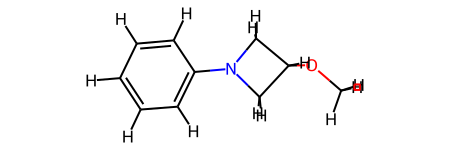

In [62]:
smi = 'OC1CC(Nc2ccccc2)C1'
smi = 'COC1CN(c2ccccc2)C1'

mol = conformer_pipeline(smi, n_jobs=8)
mol

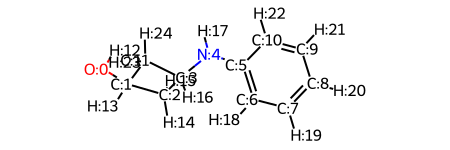

In [3]:
for atom in mol.GetAtoms():
    # if atom.GetSymbol() != 'H':
    atom.SetProp('molAtomMapNumber', str(atom.GetIdx()))
mol

In [63]:
import py3Dmol

AllChem.AlignMolConformers(mol)
print('num conformers', mol.GetNumConformers())

# Visualize using Py3Dmol
viewer = py3Dmol.view(width=600, height=400)
mol_block = Chem.MolToMolBlock(mol, confId=0)
# viewer.addModel(mol_block, "mol")

for conf in mol.GetConformers():
    mol_block = Chem.MolToMolBlock(mol, confId=conf.GetId())
    viewer.addModel(mol_block, "mol")
viewer.setStyle({"stick": {}})
viewer.setBackgroundColor("white")
viewer.show()

num conformers 6


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [64]:
import numpy as np

rms_matr = np.empty((mol.GetNumConformers(), mol.GetNumConformers()))
conf_ids = [conf.GetId() for conf in mol.GetConformers()]

for i in conf_ids:
    for j in conf_ids:
        rms_matr[i,j] = AllChem.GetConformerRMS(mol, i, j)
        
rms_matr

array([[0.        , 1.99774637, 0.90613593, 0.89136864, 0.98326495,
        1.44817219],
       [1.99774637, 0.        , 1.99014083, 1.98990134, 2.07967416,
        1.46194261],
       [0.90613593, 1.99014083, 0.        , 0.87954336, 1.14422034,
        1.15536392],
       [0.89136864, 1.98990134, 0.87954336, 0.        , 0.62011263,
        1.13161034],
       [0.98326495, 2.07967416, 1.14422034, 0.62011263, 0.        ,
        1.29833107],
       [1.44817219, 1.46194261, 1.15536392, 1.13161034, 1.29833107,
        0.        ]])

In [65]:
# query = Chem.MolFromSmarts('cccccc')
query = Chem.MolFromSmarts('cccccc')
atom_map = mol.GetSubstructMatch(query)

print(atom_map)

AllChem.AlignMolConformers(mol, atomIds=atom_map)
# AllChem.AlignMolConformers(mol, maxIters=1000)

viewer = py3Dmol.view(width=600, height=400)

for conf in mol.GetConformers():
    # if conf.GetId() in [1, 2]:
    mol_block = Chem.MolToMolBlock(mol, confId=conf.GetId())
    # print(conf.GetId())
    viewer.addModel(mol_block, "mol")
viewer.setStyle({"stick": {}})
viewer.setBackgroundColor("white")
viewer.show()

(5, 6, 7, 8, 9, 10)


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol